In [1]:
import qiskit as q
from qiskit import IBMQ
import math

# My Favorite Quantum Experiment: Spooky Action at a Distance

With qubits, it is possible to entangle them. This means that if you measure the state of one, you can determine the state of the other using the way they are engtangled with eachother. We can have the states as |0⟩ or |1⟩, much like binary, and we have the ability to operate on these qubits in order to change their states like a normal bit. As a vector, the states are as follows: $|0⟩=\begin{pmatrix} 1 \\ 0 \end{pmatrix}$ and $|1⟩=\begin{pmatrix} 0 \\ 1 \end{pmatrix}$ It is possible to maniuplate them to be linked to eachother.

In [2]:
qr = q.QuantumRegister(2, 'q') # create quantum bits in circuit
cr = q.ClassicalRegister(2, 'c0') # creates the classic bits to measure
circuit = q.QuantumCircuit(qr, cr) # creates the circuit 

All we need to know is that we can operate on these bits using matrices where $H =\frac{1}{\sqrt{2}} \begin{bmatrix}  1 & 1 \\ 1 & -1 \\ \end{bmatrix}$ Applying this to our bits puts them into a superposition of two bits. Doing the math we see:  
$H|0⟩=\frac{1}{\sqrt{2}}\begin{bmatrix}1&1\\1&-1\\\end{bmatrix}\begin{pmatrix}1\\0\end{pmatrix}=\frac{1}{\sqrt{2}}\begin{pmatrix}1\\1\end{pmatrix}=\frac{|0⟩+|1⟩}{\sqrt{2}}$ and $H|1⟩=\frac{1}{\sqrt{2}}\begin{bmatrix}1&1\\1&-1\\\end{bmatrix}\begin{pmatrix}0\\1\end{pmatrix}=\frac{1}{\sqrt{2}}\begin{pmatrix}1\\-1\end{pmatrix}=\frac{|0⟩-|1⟩}{\sqrt{2}}$  
This creates a superposition of the two states, here the chance of calculating either is equal, but this can be modified by multiplying each qubit by the sqaure root of the probability you want (they must add to one of course). So let us add this operator to a single qubit with a second one to entagnel with.

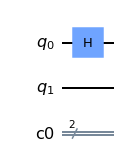

In [3]:
circuit.h(qr[0]) # Put H gate on q0 
circuit.draw(output='mpl')

Now we can try to entangle the two qubits, so if we measure the first state and discover what it is, it will determing the second. There is a specific operator that can do this called a CNOT gate or a CX gate. This is defined as:  
$CX=|00⟩⟨00|+|01⟩⟨01|+|10⟩⟨11|+|11⟩⟨10|$ Where now both the qubits are in our vector. Undersstanding how this multiplies also needs a bit of matrices and a basic understanding of Bra and Ket notation, but the easier thing to know is that if a bra ($|0⟩$) is a vector that is 1 by 2, a ket version of that ($⟨0|$) is a 2 by 1 where you take it's transpose and complex conjugate. But do not worry if you do not know what it is. Just know that applying this to our system, anything with the form $⟨n|n⟩=1$ and $⟨n|m⟩=0$  $(n\neq m)$. For example, taking a superposition state of $\frac{1}{\sqrt(2)}(|0⟩+|1⟩)$ as our control qubit and selecting our target qubit as |0⟩, which looks like $CX(|00⟩+|10⟩)$, now let us add it to the circuit this way.

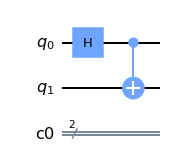

In [4]:
circuit.cx(qr[0], qr[1]) # Pit CNOT gate with q0 as control, targeting q1
circuit.draw(output='mpl')

Now that we apply the gate to the circuit, taking the operation our resulting state is $(\frac{1}{\sqrt(2)}|00⟩+|11⟩)$. The important thing to see is that we have two options with one having two zeros and the other having two ones. That means if we measure the state of one, the other is also the same! This also means we expect that we can only get these two states, we can verify by measuring both the qubits.

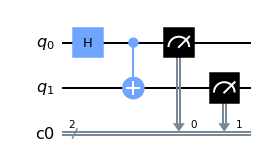

In [5]:
circuit.measure(qr, cr) # measure both quantum bits into classical bits (although not necessary in practice)
circuit.draw(output='mpl')

Technically we do not need to measure both of them because our state is not separable as $|a⟩+|b⟩$. We just need the circuit to have a classical bit to map to, otherwise our results will not actually show the value of the other qubit. But let us simulate our quantum circuit to see our results by running it a number of times and showing the probabilities of the states.

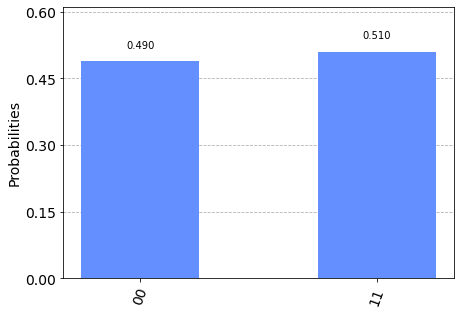

In [6]:
simulator = q.Aer.get_backend('qasm_simulator') # Simulate running the circuit
results = q.execute(circuit, backend=simulator).result()
q.visualization.plot_histogram(results.get_counts(circuit))

Here we can see that indeed, we never see $|01⟩$ or $|10⟩$ showing that we have successfully entangled the cubits! We also see that they have equal likelyhood as also predicted by how the superposition favoured neither state. But, we can take this a step further and run it on a real quantum computer! Here I will use IBMQ to access a real quantum computer that anyone who creates an account can also do!

In [7]:
#In order to access, you neeed your token from your account. I already saved my account so I don't need to do it again
#IBMQ.save_account('yourtokenhere')
IBMQ.load_account() #Loads IBMQ account for job posting and retrieval

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

One thing to note is that the computer I chose did not have the H operator available, and so it had to recreate the circuit, but it's operations are the same that I have shown before.

In [8]:
# Rebuild the circuit that was used
qrE = q.QuantumRegister(5, 'q')
crE = q.ClassicalRegister(2, 'c0')
circuitEq = q.QuantumCircuit(qrE, crE)

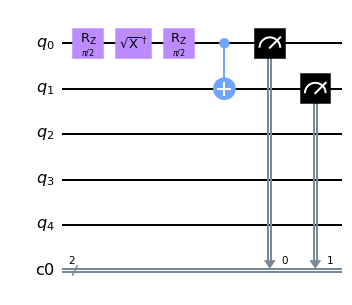

In [9]:
# Adding components it used
circuitEq.rz(math.pi/2,qrE[0]) # The computer did not have an H gate, so it build an equivalent from these 3
circuitEq.sxdg(qrE[0])
circuitEq.rz(math.pi/2,qrE[0])
circuitEq.cx(qrE[0],qrE[1])
circuitEq.measure(qrE[0:2], crE[0:2])

circuitEq.draw(output='mpl')

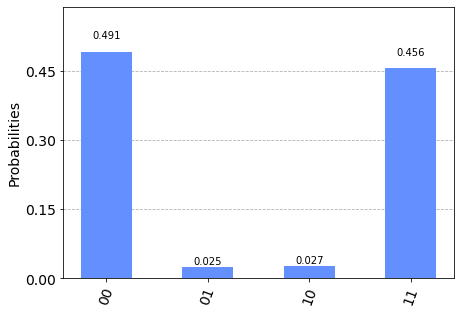

In [10]:
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_lima') # This was the backend used for the original job, you might want to find one with a low queue
job = qcomp.retrieve_job('6087150c6455fe2fe81900df') # I am pulling from a job I have already done because it too 20 minutes to get to it
# job = q.execute(circuit, backend=qcomp)
q_result = job.result()
q.visualization.plot_histogram(q_result.get_counts()) # No circuit argument here because of naming issues

Now that we have run the circuit we can see that we still have the majority of the states being what we expect. The other states present actually represent the quantum noise in the system, because it is not perfect. This shows that we can indeed have Spooky action at a distance, because no matter which qubit we choose to measure, the other one will be determined. This is an instanteneous occurance that does not depend on how far away they are! If we think of the world as being deterministic and there is no definitive state before the collapse of the qubits, the 'information' of the state has to travel to the other faster than the speed of light, which would violate a few laws. This type of experiment was actually conducted by measuring the two states very far from eachother such that light could not reach the other by the time they are measured, and they still say this spooky action! This is what makes quantum so unique in that reality is not as set in stone as we think. I highly recommend looking at this yourself at https://quantum-computing.ibm.com/. And you can even compose your own circuits there too, no coding required!